In [ ]:
import glob
import zipfile

files = glob.glob("*.zip")

for file in files:
    handle = zipfile.ZipFile(file)
    handle.extractall("images")
    handle.close()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
files = os.listdir("images/asianman/")

asianman_train = []
for file in files:
    img = mpimg.imread("images/asianman/" + file)
    asianman_train.append([img, 0])
print(len(asianman_train))

files = os.listdir("images/asianwomen/")

asianwomen_train = []
for file in files:
    img = mpimg.imread("images/asianwomen/" + file)
    asianwomen_train.append([img, 1])
print(len(asianwomen_train))

files = os.listdir("images/blackman/")

blackman_train = []
for file in files:
    img = mpimg.imread("images/blackman/" + file)
    blackman_train.append([img, 2])
print(len(blackman_train))

files = os.listdir("images/blackwoman/")

blackwoman_train = []
for file in files:
    img = mpimg.imread("images/blackwoman/" + file)
    blackwoman_train.append([img, 3])
print(len(blackwoman_train))

files = os.listdir("images/indianman/")

indianman_train = []
for file in files:
    img = mpimg.imread("images/indianman/" + file)
    indianman_train.append([img, 4])
print(len(indianman_train))

files = os.listdir("images/indianwoman/")

indianwoman_train = []
for file in files:
    img = mpimg.imread("images/indianwoman/" + file)
    indianwoman_train.append([img, 5])
print(len(indianwoman_train))

files = os.listdir("images/latinoman/")

latinoman_train = []
for file in files:
    img = mpimg.imread("images/latinoman/" + file)
    latinoman_train.append([img, 6])
print(len(latinoman_train))

files = os.listdir("images/latinowoman/")

latinowoman_train = []
for file in files:
    img = mpimg.imread("images/latinowoman/" + file)
    latinowoman_train.append([img, 7])
print(len(latinowoman_train))

files = os.listdir("images/whiteman/")

whiteman_train = []
for file in files:
    img = mpimg.imread("images/whiteman/" + file)
    whiteman_train.append([img, 8])
print(len(whiteman_train))

files = os.listdir("images/whitewoman/")

whitewoman_train = []
for file in files:
    img = mpimg.imread("images/whitewoman/" + file)
    whitewoman_train.append([img, 9])
print(len(whitewoman_train))

451
663
1980
1972
1829
1339
556
612
3698
2815


In [3]:
asianman_train = asianman_train * 8
print(len(asianman_train))

asianwomen_train = asianwomen_train * 5
print(len(asianwomen_train))

blackman_train = blackman_train * 2
print(len(blackman_train))

blackwoman_train = blackwoman_train * 2
print(len(blackwoman_train))

indianman_train = indianman_train * 2
print(len(indianman_train))

indianwoman_train = indianwoman_train * 2
print(len(indianwoman_train))

latinoman_train = latinoman_train * 6
print(len(latinoman_train))

latinowoman_train = latinowoman_train * 6
print(len(latinowoman_train))

training_data = asianman_train + asianwomen_train + blackman_train + blackwoman_train + indianman_train + indianwoman_train + latinoman_train + latinowoman_train + whiteman_train + whitewoman_train

print(len(training_data))

3608
3315
3960
3944
3658
2678
3336
3672
34684


0


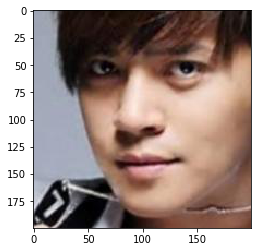

In [4]:
index = random.randint(0, len(training_data))
image = training_data[index][0].squeeze()

plt.imshow(image)
print(training_data[index][1])

4

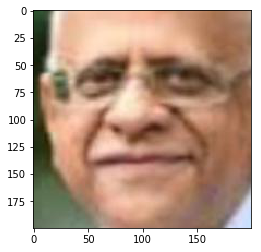

In [5]:
random.shuffle(training_data)

plt.imshow(training_data[0][0])
training_data[0][1]

In [6]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train)

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34684
Image data shape = (200, 200, 3)
Number of classes = 10


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print("Updated Image /Shape: {}".format(X_train[0].shape))

Updated Image /Shape: (200, 200, 3)


1


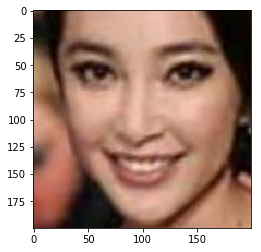

In [9]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.imshow(image)
print(y_train[index])

In [10]:
# Set a couple flags for training - you can ignore these for now
freeze_flag = False  # `True` to freeze layers, `False` for full training
weights_flag = 'imagenet' # 'imagenet' or None
preprocess_flag = True # Should be true for ImageNet pre-trained typically

# Loads in InceptionV3
from keras.applications.inception_v3 import InceptionV3

# We can use smaller than the default 299x299x3 input for InceptionV3
# which will speed up training. Keras v2.0.9 supports down to 139x139x3
input_size = 200

# Using Inception with ImageNet pre-trained weights
inception = InceptionV3(weights=weights_flag, include_top=False,
                        input_shape=(input_size,input_size,3))

Using TensorFlow backend.


87916544/87910968 [==============================] - 1s 0us/step


In [11]:
if freeze_flag == True:
    ## TODO: Iterate through the layers of the Inception model
    ##       loaded above and set all of them to have trainable = False
    for layer in inception.layers:
        layer.trainable = False

In [12]:
## TODO: Use the model summary function to see all layers in the
##       loaded Inception model
inception.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 99, 99, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 99, 99, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [13]:
from keras.layers import Input, Lambda

# Makes the input placeholder layer 32x32x3 for CIFAR-10
image_input = Input(shape=(200,200,3))

# Re-sizes the input with Kera's Lambda layer & attach to cifar_input
#resized_input = Lambda(lambda image: tf.image.resize_images( 
    #image, (input_size, input_size)))(cifar_input)

# Feeds the re-sized input into Inception model
# You will need to update the model name if you changed it earlier!
inp = inception(image_input)

In [14]:
# Imports fully-connected "Dense" layers & Global Average Pooling
from keras.layers import Dense, GlobalAveragePooling2D

## TODO: Setting `include_top` to False earlier also removed the
##       GlobalAveragePooling2D layer, but we still want it.
##       Add it here, and make sure to connect it to the end of Inception
x = GlobalAveragePooling2D()(inp)

## TODO: Create two new fully-connected layers using the Model API
##       format discussed above. The first layer should use `out`
##       as its input, along with ReLU activation. You can choose
##       how many nodes it has, although 512 or less is a good idea.
##       The second layer should take this first layer as input, and
##       be named "predictions", with Softmax activation and 
##       10 nodes, as we'll be using the CIFAR10 dataset.
x = Dense(512, activation = 'relu')(x)
predictions = Dense(10, activation = 'softmax')(x)

In [15]:
# Imports the Model API
from keras.models import Model

# Creates the model, assuming your final layer is named "predictions"
model = Model(inputs=image_input, outputs=predictions)

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the summary of this new model to confirm the architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 22,857,002
Trainable params: 22,822,570
Non-trainable params: 34,432
_________________________________________________________________


In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y_one_hot_train = label_binarizer.fit_transform(y_train)
y_one_hot_val = label_binarizer.fit_transform(y_valid)

# Shuffle the training & test data
X_train, y_one_hot_train = shuffle(X_train, y_one_hot_train)
X_valid, y_one_hot_val = shuffle(X_valid, y_one_hot_val)

In [17]:
# Use a generator to pre-process our images for ImageNet
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

if preprocess_flag == True:
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
else:
    datagen = ImageDataGenerator()
    val_datagen = ImageDataGenerator()

In [18]:
# Train the model
batch_size = 32
epochs = 10
# Note: we aren't using callbacks here since we only are using 5 epochs to conserve GPU time
model.fit_generator(datagen.flow(X_train, y_one_hot_train, batch_size=batch_size), 
                    steps_per_epoch=len(X_train)/batch_size, epochs=epochs, verbose=1, 
                    validation_data=val_datagen.flow(X_valid, y_one_hot_val, batch_size=batch_size),
                    validation_steps=len(X_valid)/batch_size)

Epoch 1/10
868/867 [==============================] - 667s 769ms/step - loss: 1.0923 - acc: 0.6099 - val_loss: 1.5091 - val_acc: 0.5081
Epoch 2/10
868/867 [==============================] - 661s 761ms/step - loss: 0.6923 - acc: 0.7605 - val_loss: 0.7212 - val_acc: 0.7440
Epoch 3/10
868/867 [==============================] - 635s 732ms/step - loss: 0.5171 - acc: 0.8233 - val_loss: 0.7135 - val_acc: 0.7627
Epoch 4/10
868/867 [==============================] - 633s 729ms/step - loss: 0.3822 - acc: 0.8701 - val_loss: 0.4838 - val_acc: 0.8362
Epoch 5/10
868/867 [==============================] - 632s 728ms/step - loss: 0.4660 - acc: 0.8445 - val_loss: 0.4141 - val_acc: 0.8599
Epoch 6/10
868/867 [==============================] - 646s 744ms/step - loss: 0.2313 - acc: 0.9243 - val_loss: 0.4948 - val_acc: 0.8508
Epoch 7/10
868/867 [==============================] - 634s 731ms/step - loss: 0.1936 - acc: 0.9358 - val_loss: 0.3396 - val_acc: 0.8958
Epoch 8/10
868/867 [============================